<a href="https://colab.research.google.com/github/cijinjosephjohn/Intrusion-Detection/blob/main/MiniProject_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
data1 = pd.read_csv("/content/drive/MyDrive/data_set for intrusion detection/KDDCup99.csv")

In [79]:
data1.head()

,id,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,1,0,tcp,http,SF,181,5450,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,2,0,tcp,http,SF,239,486,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,3,0,tcp,http,SF,235,1337,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,4,0,tcp,http,SF,219,1337,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,5,0,tcp,http,SF,217,2032,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [80]:
print("Train data has {} rows & {} columns".format(data1.shape[0],data1.shape[1]))

Train data has 494020 rows & 43 columns


In [81]:
data1['label'].value_counts()

smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: label, dtype: int64

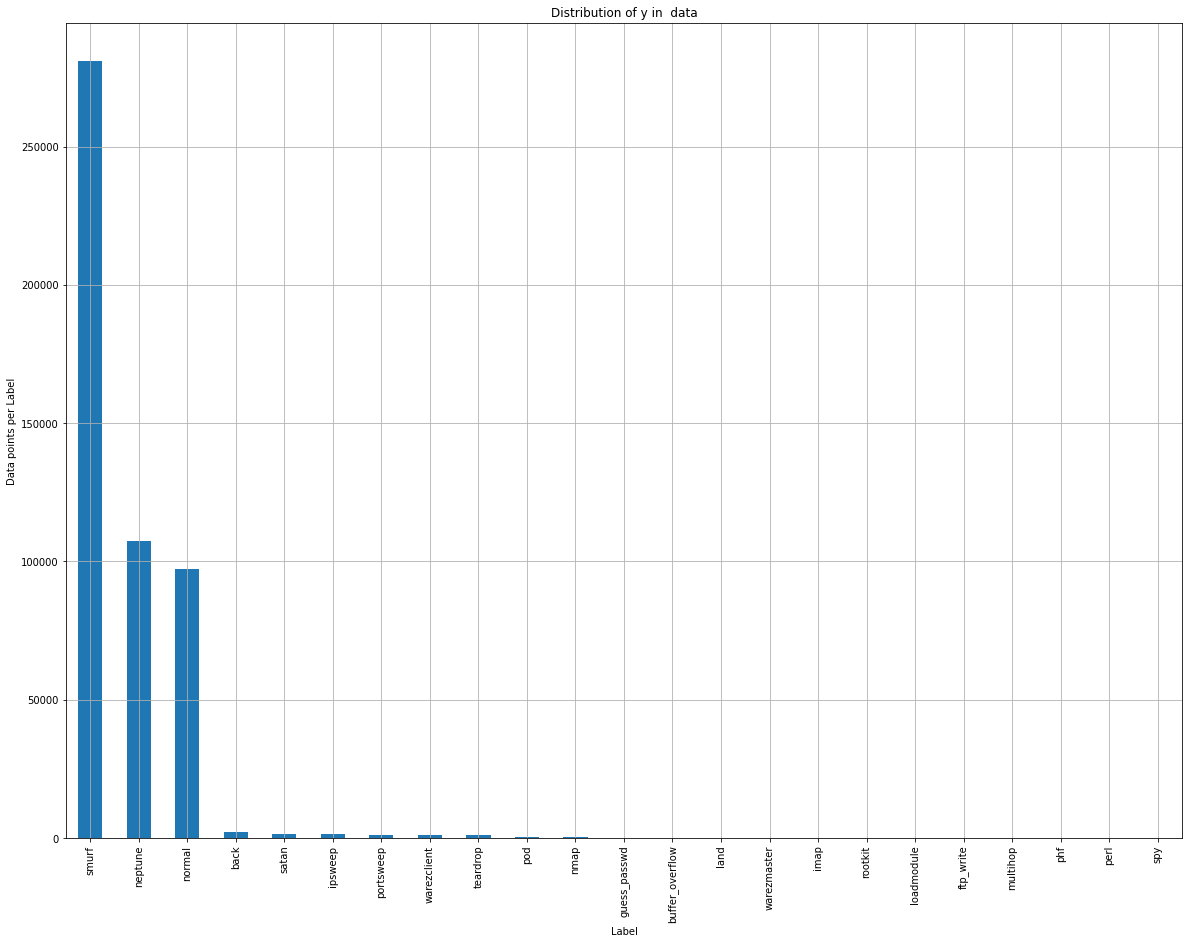

In [82]:
plt.figure(figsize=(20,15))
class_distribution = data1['label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Data points per Label')
plt.title('Distribution of y in  data')
plt.grid()
plt.show()

In [83]:

attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [84]:

data1['label'] = data1['label'].apply(lambda v : attacks_types[v])

In [85]:
data1.head()

,id,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,1,0,tcp,http,SF,181,5450,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,2,0,tcp,http,SF,239,486,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,3,0,tcp,http,SF,235,1337,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,4,0,tcp,http,SF,219,1337,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,5,0,tcp,http,SF,217,2032,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [86]:
data1['label'].value_counts()

dos       391458
normal     97277
probe       4107
r2l         1126
u2r           52
Name: label, dtype: int64

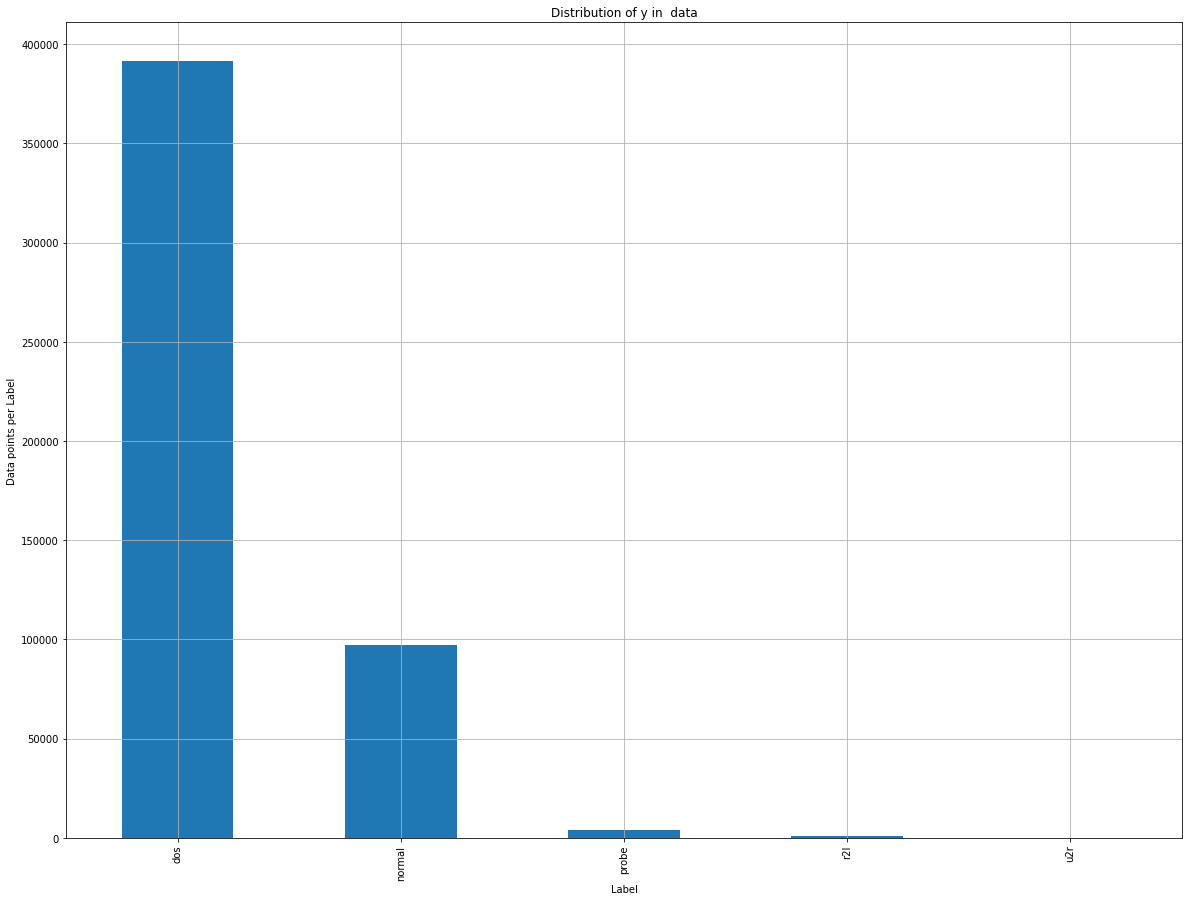

In [87]:
plt.figure(figsize=(20,15))
class_distribution = data1['label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Data points per Label')
plt.title('Distribution of y in  data')
plt.grid()
plt.show()

In [88]:
print("data has {} rows & {} columns".format(data1.shape[0],data1.shape[1]))

data has 494020 rows & 43 columns


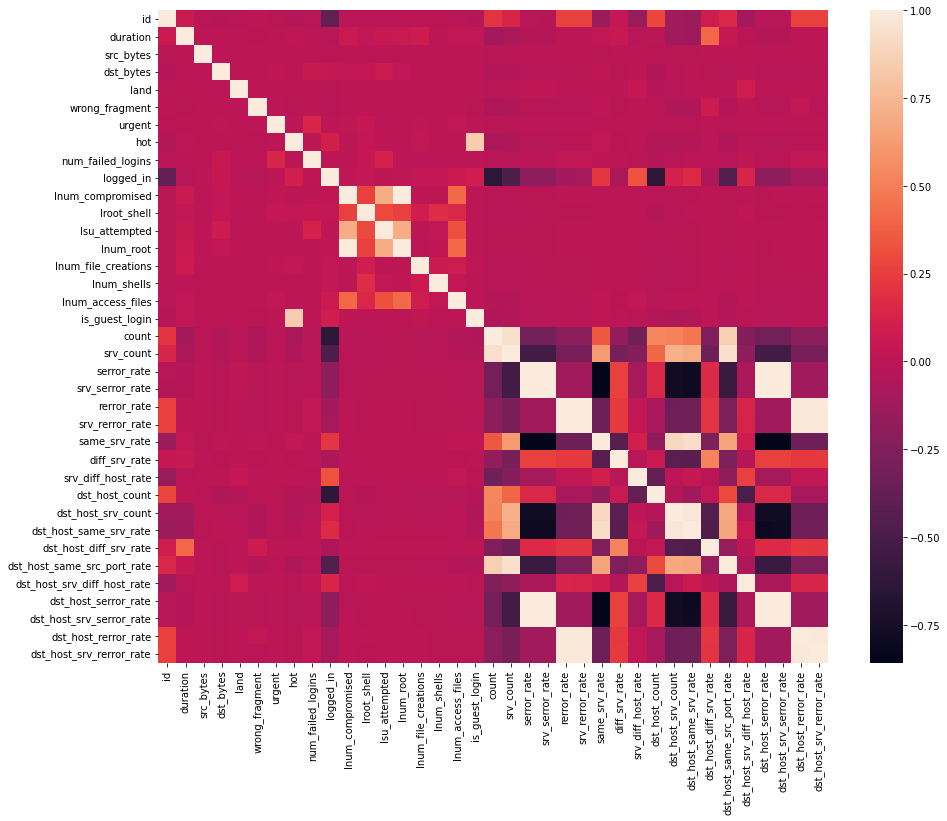

In [89]:
import seaborn as sns
  
data1 = data1[[col for col in data1 if data1[col].nunique() > 1]]
corr = data1.corr()
plt.figure(figsize =(15, 12))
  
sns.heatmap(corr)
  
plt.show()

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = data1.select_dtypes(include=['float64','int64']).columns
sc_data = scaler.fit_transform(data1.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_dataframe1 = pd.DataFrame(sc_data, columns = cols)

In [91]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from data sets 
cat_data1 = data1.select_dtypes(include=['object']).copy()

# encode the categorical attributes
en_data1 = cat_data1.apply(encoder.fit_transform)


In [92]:
data1_df = pd.concat([sc_dataframe1,en_data1],axis=1)
data1_df.shape

(494020, 41)

In [93]:
data1_df.describe()

,id,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,label
count,4.940200e+05,4.940200e+05,4.940200e+05,4.940200e+05,4.940200e+05,4.940200e+05,4.940200e+05,4.940200e+05,4.940200e+05,4.940200e+05,...,4.940200e+05,4.940200e+05,4.940200e+05,4.940200e+05,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000
mean,3.313814e-17,-3.720849e-17,-4.818263e-19,1.369250e-17,7.479094e-18,3.428877e-17,-2.443291e-18,-2.876575e-17,5.968893e-18,-9.941442e-17,...,2.107954e-16,8.284535e-18,-2.485361e-17,-1.896238e-16,2.319670e-16,1.146027e-16,0.467131,23.408896,7.842444,0.220795
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.575606,13.538346,2.250855,0.451232
min,-1.732047e+00,-6.779179e-02,-3.061688e-03,-2.628725e-02,-6.673424e-03,-4.772023e-02,-2.571471e-03,-4.413596e-02,-9.782195e-03,-4.171889e-01,...,-1.250624e+00,-1.586295e-01,-4.644182e-01,-4.632030e-01,-2.520398e-01,-2.494643e-01,0.000000,0.000000,0.000000,0.000000
25%,-8.660237e-01,-6.779179e-02,-3.016152e-03,-2.628725e-02,-6.673424e-03,-4.772023e-02,-2.571471e-03,-4.413596e-02,-9.782195e-03,-4.171889e-01,...,-1.250624e+00,-1.586295e-01,-4.644182e-01,-4.632030e-01,-2.520398e-01,-2.494643e-01,0.000000,14.000000,9.000000,0.000000
50%,0.000000e+00,-6.779179e-02,-2.535489e-03,-2.628725e-02,-6.673424e-03,-4.772023e-02,-2.571471e-03,-4.413596e-02,-9.782195e-03,-4.171889e-01,...,8.270455e-01,-1.586295e-01,-4.644182e-01,-4.632030e-01,-2.520398e-01,-2.494643e-01,0.000000,14.000000,9.000000,0.000000
75%,8.660237e-01,-6.779179e-02,-2.017384e-03,-2.628725e-02,-6.673424e-03,-4.772023e-02,-2.571471e-03,-4.413596e-02,-9.782195e-03,-4.171889e-01,...,8.270455e-01,-1.586295e-01,-4.644182e-01,-4.632030e-01,-2.520398e-01,-2.494643e-01,1.000000,42.000000,9.000000,0.000000
max,1.732047e+00,8.234731e+01,7.016393e+02,1.560109e+02,1.498481e+02,2.220661e+01,5.444366e+02,3.831400e+01,3.221635e+02,2.396996e+00,...,8.270455e-01,2.357581e+01,2.163060e+00,2.162025e+00,4.084671e+00,4.095711e+00,2.000000,65.000000,10.000000,4.000000


In [94]:
data1_df.head()

,id,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,label
0,-1.732047,-0.067792,-0.002879,0.138664,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396996,...,-1.022080,-0.158629,-0.464418,-0.463203,-0.25204,-0.249464,1,22,9,1
1,-1.732040,-0.067792,-0.002820,-0.011578,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396996,...,-1.146741,-0.158629,-0.464418,-0.463203,-0.25204,-0.249464,1,22,9,1
2,-1.732033,-0.067792,-0.002824,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396996,...,-1.188294,-0.158629,-0.464418,-0.463203,-0.25204,-0.249464,1,22,9,1
3,-1.732026,-0.067792,-0.002840,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396996,...,-1.188294,-0.158629,-0.464418,-0.463203,-0.25204,-0.249464,1,22,9,1
4,-1.732019,-0.067792,-0.002842,0.035214,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396996,...,-1.209071,-0.158629,-0.464418,-0.463203,-0.25204,-0.249464,1,22,9,1


In [95]:
#dividing the data to 2 categories X and Y for training
X = data1_df.drop(columns=['id','label'],axis=1)
Y = data1_df['label']

In [96]:
X.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,-0.067792,-0.002879,0.138664,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396996,-0.005679,...,-0.282867,-1.022080,-0.158629,-0.464418,-0.463203,-0.25204,-0.249464,1,22,9
1,-0.067792,-0.002820,-0.011578,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396996,-0.005679,...,-0.282867,-1.146741,-0.158629,-0.464418,-0.463203,-0.25204,-0.249464,1,22,9
2,-0.067792,-0.002824,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396996,-0.005679,...,-0.282867,-1.188294,-0.158629,-0.464418,-0.463203,-0.25204,-0.249464,1,22,9
3,-0.067792,-0.002840,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396996,-0.005679,...,-0.282867,-1.188294,-0.158629,-0.464418,-0.463203,-0.25204,-0.249464,1,22,9
4,-0.067792,-0.002842,0.035214,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396996,-0.005679,...,-0.282867,-1.209071,-0.158629,-0.464418,-0.463203,-0.25204,-0.249464,1,22,9


In [97]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [98]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

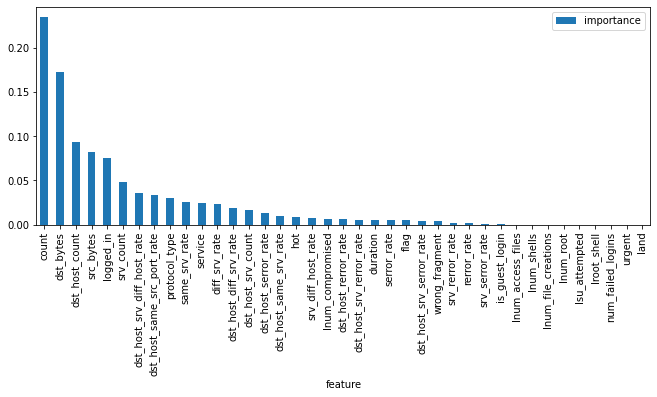

In [99]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(x_train,y_train);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':x_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar(); 

selecting the important feature by dividing the actual data set into train and test data set
and only  using the train data set we plot the importance of the data

In [100]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 15 attributes
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)


In [101]:

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), x_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['src_bytes',
 'dst_bytes',
 'logged_in',
 'lnum_compromised',
 'count',
 'srv_count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'protocol_type',
 'flag']

In [102]:
x_train.shape

(395216, 39)

In [103]:
#from sklearn.svm import SVC 
#

#from sklearn.model_selection import cross_val_score
# from sklearn.neighbors import K-NeighborsClassifier
# from sklearn.linear_model import LogisticRegression




In [104]:
from sklearn import tree
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [105]:
# 
from sklearn.naive_bayes import BernoulliNB 
# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(x_train, y_train)

BernoulliNB()

In [106]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_train, DTC_Classifier.predict(x_train))

print(f"Accuracy = {accuracy}")

accuracy2 = metrics.accuracy_score(y_test, DTC_Classifier.predict(x_test))

print(f"\nAccuracy of test = {accuracy2}")

Accuracy = 0.9999974697380672

Accuracy of test = 0.9997166106635359


In [107]:
from sklearn.model_selection import cross_val_score
#finding the cross validation accuracy
scores = cross_val_score(DTC_Classifier,x_train,y_train,cv=10)


In [108]:
confusion_matrix = metrics.confusion_matrix(y_train,DTC_Classifier.predict(x_train))

In [109]:
classification = metrics.classification_report(y_train,DTC_Classifier.predict(x_train))

In [110]:
print(f"Scores \n {scores}\n\nConfusion matrix \n {confusion_matrix}\n\nclassification \n{classification}\n")

Scores 
 [0.99979758 0.99951926 0.99967107 0.99972167 0.99974698 0.99972167
 0.99979758 0.99969636 0.99987348 0.99941803]

Confusion matrix 
 [[313026      0      0      0      0]
 [     1  77952      0      0      0]
 [     0      0   3285      0      0]
 [     0      0      0    911      0]
 [     0      0      0      0     41]]

classification 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    313026
           1       1.00      1.00      1.00     77953
           2       1.00      1.00      1.00      3285
           3       1.00      1.00      1.00       911
           4       1.00      1.00      1.00        41

    accuracy                           1.00    395216
   macro avg       1.00      1.00      1.00    395216
weighted avg       1.00      1.00      1.00    395216




In [111]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_train, BNB_Classifier.predict(x_train))

print(f"Accuracy = {accuracy}")

accuracy2 = metrics.accuracy_score(y_test, BNB_Classifier.predict(x_test))

print(f"\nAccuracy of test = {accuracy2}")

Accuracy = 0.9313615845512327

Accuracy of test = 0.9310453018096433


StratifiedKFold cross validation is used by cv=10

In [113]:
scores = cross_val_score(BNB_Classifier,x_train,y_train,cv=10)
confusion_matrix = metrics.confusion_matrix(y_train,BNB_Classifier.predict(x_train))
classification = metrics.classification_report(y_train,BNB_Classifier.predict(x_train))

In [114]:
print(f"Scores \n {scores}\n\nConfusion matrix \n {confusion_matrix}\n\nclassification \n{classification}\n")

Scores 
 [0.93304995 0.93089925 0.93229088 0.93094985 0.93069683 0.9304185
 0.93087219 0.93109992 0.93115053 0.93223856]

Confusion matrix 
 [[294555   1510  16470     18    473]
 [  2083  71118   4322    372     58]
 [   204   1025   2056      0      0]
 [     8    554      6    336      7]
 [     0     13      0      4     24]]

classification 
              precision    recall  f1-score   support

           0       0.99      0.94      0.97    313026
           1       0.96      0.91      0.93     77953
           2       0.09      0.63      0.16      3285
           3       0.46      0.37      0.41       911
           4       0.04      0.59      0.08        41

    accuracy                           0.93    395216
   macro avg       0.51      0.69      0.51    395216
weighted avg       0.98      0.93      0.95    395216




In [ ]:
#new to be 